In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
import sqlite3

conn = sqlite3.connect("../db.sqlite3")

query = """
    SELECT * FROM restaurant_order
    JOIN restaurant_orderitem ON restaurant_order.id = restaurant_orderitem.order_id
    JOIN restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id;
"""

combined_data = pd.read_sql_query(query, conn)

combined_data.to_csv("combined_data.csv", index=False)

df = pd.read_csv("combined_data.csv")

print("Length of DF:", len(df))


Length of DF: 74818


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

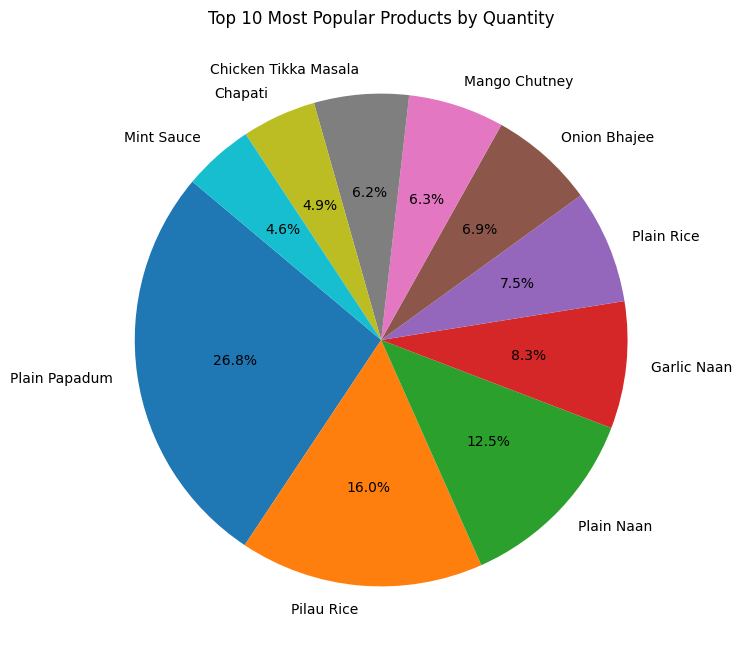

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

product_quantity = df.groupby("name")["quantity"].sum()

top_10_products = product_quantity.nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Products")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

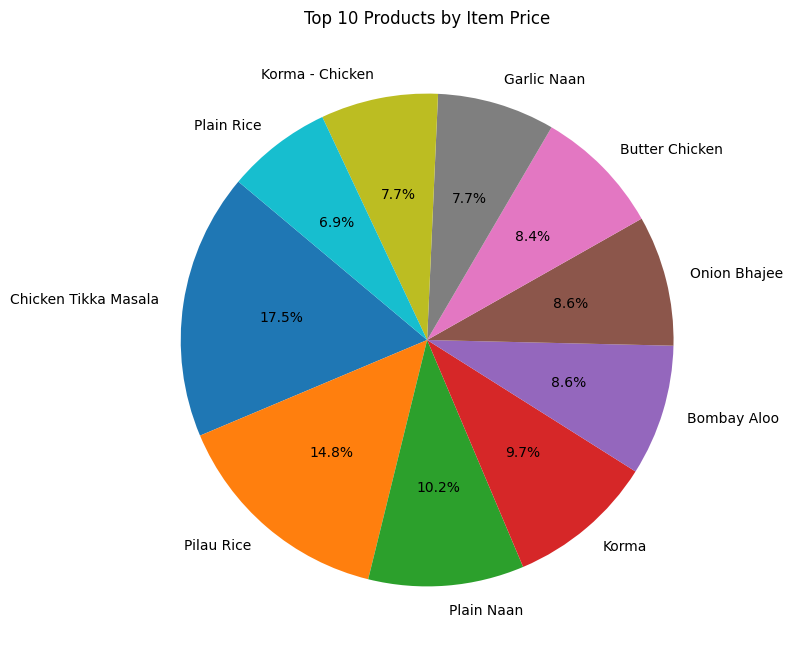

In [7]:
df["item_price"] = df["quantity"] * df["price"]

product_item_price = df.groupby("name")["item_price"].sum()

top_10_products_item_price = product_item_price.nlargest(10)

plt.figure(figsize=(8, 8))
plt.pie(top_10_products_item_price, labels=top_10_products_item_price.index, autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Products by Item Price")
plt.show()


# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

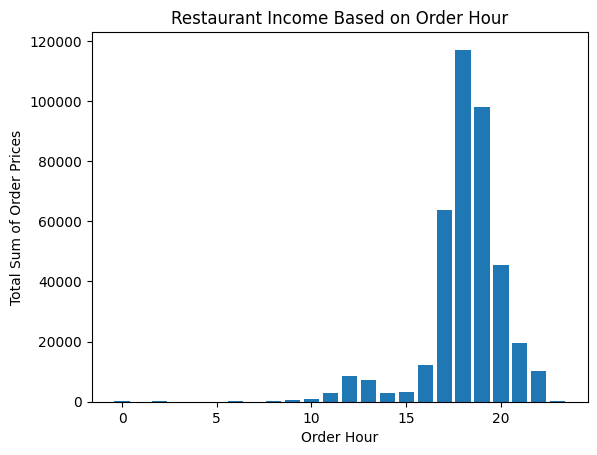

In [8]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["order_hour"] = df["datetime"].dt.hour

hourly_income = df.groupby("order_hour")["price"].sum()

plt.bar(hourly_income.index, hourly_income.values)
plt.xlabel("Order Hour")
plt.ylabel("Total Sum of Order Prices")
plt.title("Restaurant Income Based on Order Hour")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

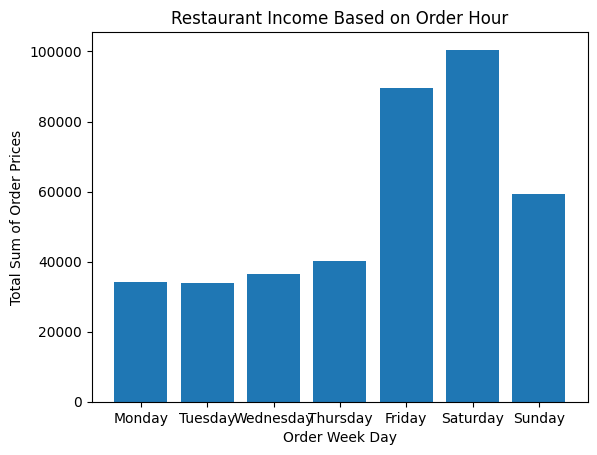

In [9]:
df["datetime"] = pd.to_datetime(df["datetime"])

df["order_weekday"] = df["datetime"].dt.day_name()

days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

hourly_income = df.groupby("order_weekday")["price"].sum().reindex(days_order)

plt.bar(hourly_income.index, hourly_income.values)
plt.xlabel("Order Week Day")
plt.ylabel("Total Sum of Order Prices")
plt.title("Restaurant Income Based on Order Hour")
plt.show()